In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import NMF

In [2]:
movies_df = pd.read_csv('movies.csv')

In [3]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
ratings_df = pd.read_csv('ratings.csv')

In [5]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
movies_df.shape, ratings_df.shape

((9742, 3), (100836, 4))

In [7]:
# Creating a dictionary of the movie titles and id
movies_df.drop(['genres'], axis=1, inplace=True)
movies_dict = dict(movies_df.values)

In [8]:
ratings_df.drop('timestamp', axis=1, inplace=True)             #NMF
R=ratings_df

In [9]:
R.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [10]:
len(R)

100836

In [11]:
R_wide = pd.pivot_table(R, values='rating', index=['userId'], columns= ['movieId'])

In [12]:
R_wide.isnull().sum()

movieId
1         395
2         500
3         558
4         603
5         561
         ... 
193581    609
193583    609
193585    609
193587    609
193609    609
Length: 9724, dtype: int64

In [13]:
R_wide.shape

(610, 9724)

In [14]:
R_wide = R_wide.fillna(0)

In [15]:
nmf = NMF(n_components=610)

In [16]:
nmf.fit(R_wide)

NMF(n_components=610)

In [17]:
Q = nmf.components_

In [18]:
Q.shape

(610, 9724)

In [19]:
P = nmf.transform(R_wide)

In [20]:
P.shape

(610, 610)

In [21]:
P = pd.DataFrame(nmf.transform(R_wide), index=R_wide.index)

In [22]:
R_hat = pd.DataFrame(np.dot(P, Q), columns=R_wide.columns, index=R_wide.index)
round(R_hat, 2)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,3.98,0.00,4.00,0.00,0.00,4.00,0.02,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.99,0.14,0.24,0.00,0.22,0.22,0.19,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.50,0.00,0.05,0.00,0.00,0.00,2.50,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.50,2.00,1.99,0.00,0.00,0.02,0.01,0.0,0.0,4.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
nmf.reconstruction_err_

87.33904593133616

### prediction based on new user

In [41]:
# Create a dictionary for a new user
new_user = {'Jumanji (1995)': 5.0, 'Toy Story (1995)': 3.0}
new_user_keys = new_user.keys()

def get_key(val):
    for key, value in movies_dict.items():
         if val == value:
             return key

input_dict= {}
for key in new_user_keys:
    my_movieId = get_key(key)
    rating = new_user[key]
    input_dict.update({my_movieId:rating})
    
print(input_dict)

{2: 5.0, 1: 3.0}


In [42]:
new_user = pd.DataFrame(input_dict, index=['Marta'], columns=R_wide.columns)
new_user

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
Marta,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Prediction step 1 - generate user_P 
user_P = nmf.transform(new_user.fillna(0))
user_P

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.14167999e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.13126369e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [44]:
#new user R - reconstruct R but for this new user only
user_R = pd.DataFrame(np.dot(user_P, Q), columns=R_wide.columns, index=['Marta'])
user_R

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
Marta,1.012172,0.646645,0.105232,0.0,0.316792,0.099995,0.11701,0.05038,0.029726,0.080973,...,1.483080e-15,1.271211e-15,1.694948e-15,1.694948e-15,1.483080e-15,1.694948e-15,1.483080e-15,1.483080e-15,1.483080e-15,0.0


In [45]:
# remove movies that have been seen already
recommendations = user_R.loc[:,list(set(user_R.columns).difference(set(new_user.keys())))]

In [47]:
# Remove movies that have already been seen
recommendations = user_R.drop(columns=input_dict.keys())
recommendations

movieId,3,4,5,6,7,8,9,10,11,12,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
Marta,0.105232,0.0,0.316792,0.099995,0.11701,0.05038,0.029726,0.080973,0.311799,0.069898,...,1.483080e-15,1.271211e-15,1.694948e-15,1.694948e-15,1.483080e-15,1.694948e-15,1.483080e-15,1.483080e-15,1.483080e-15,0.0


In [49]:
# Sort the recomendations
my_rec = recommendations.sort_values(axis=1, by='Marta', ascending=False)
my_rec

movieId,62,590,344,141,5,380,11,317,161,480,...,63540,5181,5171,5165,63876,5156,5155,5151,5134,193609
Marta,0.441541,0.343579,0.329726,0.317063,0.316792,0.311963,0.311799,0.283667,0.276481,0.271081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
rec_dict = my_rec.to_dict()

In [51]:
rec_dict_5 = {k: rec_dict[k] for k in list(rec_dict)[0:5]}

In [52]:
rec_dict_5

{62: {'Marta': 0.4415405495188266},
 590: {'Marta': 0.3435786530106541},
 344: {'Marta': 0.3297259491135508},
 141: {'Marta': 0.31706346982335065},
 5: {'Marta': 0.31679230800707325}}

In [54]:
my_rec_dict = {}
for key in rec_dict_5.keys():
    my_rec_dict.update({key:rec_dict_5[key]['Marta'] })

user_rec = {}
for key in my_rec_dict:
    user_rec.update({movies_dict[key]:my_rec_dict[key]})

print(user_rec)


{"Mr. Holland's Opus (1995)": 0.4415405495188266, 'Dances with Wolves (1990)': 0.3435786530106541, 'Ace Ventura: Pet Detective (1994)': 0.3297259491135508, 'Birdcage, The (1996)': 0.31706346982335065, 'Father of the Bride Part II (1995)': 0.31679230800707325}


In [78]:
ratings_df=ratings_df.T

In [79]:
ratings_df.drop(['userId'], inplace=True)

In [73]:
ratings_df

,userId,movieId,rating
0,1.0,1.0,4.0
1,1.0,3.0,4.0
2,1.0,6.0,4.0
3,1.0,47.0,5.0
4,1.0,50.0,5.0
...,...,...,...
100831,610.0,166534.0,4.0
100832,610.0,168248.0,5.0
100833,610.0,168250.0,5.0
100834,610.0,168252.0,5.0


<AxesSubplot:>

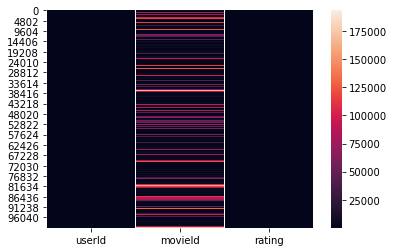

In [74]:
sns.heatmap(ratings_df.fillna(0))

In [75]:
# Implement cosine similarity
def cosim(X, Y):
    num = np.nansum(X*Y) # np.dot(X, Y)
    denom = np.sqrt(np.nansum(X*X)*np.nansum(Y*Y)) # np.sqrt(np.dot(X, X)*np.dot(Y, Y))
    return num/denom

In [76]:
cosim(ratings_df['3'], ratings_df['73'])

KeyError: '3'